# `692 Team 1 Proj-1 : Crime Novel Plot Analysis with Regex - Agatha Christie`

## Objective
The goal of this project is to conduct a plot and protagonist/antagonist analysis of the famous crime novels. For this project, we will analyze five publicly available crime novels/stories by Agatha Christie at the project Gutenberg http://www.gutenberg.org/. The novels chosen are: 

- The Murder on the Links 
- The Mysterious Affair at Styles 
- The Secret Adversary 
- The Man in the Brown Suit 
- The Secret of Chimneys 

Note: Feel free to use any background resource for the understanding of the plot, protagonist and antagonist names, and other details. Look for spoilers, details, etc. Our goal is not to predict the crime, but to computationally analyze the structure of the plot.


## Data Collection and Preparation 

### Background Research for Data Collection and Preparation 

##### Data Collection
Location for Plain text UTF-8 files for novels: 
- The Mysterious Affair at Styles https://www.gutenberg.org/files/863/863-0.txt
- The Murder on the Links https://www.gutenberg.org/files/58866/58866-0.txt
- The Secret Adversary https://www.gutenberg.org/files/1155/1155-0.txt
- The Man in the Brown Suit https://www.gutenberg.org/files/61168/61168-0.txt
- The Secret of Chimneys https://www.gutenberg.org/files/65238/65238-0.txt

Note: One benefit to getting the text version is that the html version also has page number to clean, not present in text files

##### Data Preparation
- There are inconsistencies between the novel formats. Some of them start with a prologue and others dont. 
- There is START OF THE PROJECT present in the beginning of most but not all books, others have 'START OF THIS PROJECT', but   table of contents appear after that.
- Some of them have the word table of contents, others say contents
- some follow roman numeral in naming chapters, others dont
- Some use the word 'chapter' , others just kist chapter titles followed by a number
- Novel text files have license and other info at the end

These factors above will need to be considered in data cleaning. 
Listing a few key particulars below: 

- The Murder on the Links 
  - This Phrase is present at the beginning - \*** START OF THIS PROJECT 
  - The Novel plot starts at second instance of '1 A Fellow Traveller'. Novel ends at 'End of Project Gutenberg's The Murder on the Links, by Agatha Christie
  - and has \*** END OF THIS PROJECT GUTENBERG ...' at the end. .
  - Each chapter  starts with number followed by title of chapter
  
  
- The Mysterious Affair at Styles 
    - This Phrase is present at the beginning - \*** START OF THE PROJECT 
    - The Novel plot starts at second instance of 'chapter I.' # period is important here. 
    - Novel ends at 'THE END' and has \*** END OF THE PROJECT GUTENBERG EBOOK...'. 
    - Each chapter starts with 'Chapter' followed by chapter number in roman numeral, followed by new line, followed by title of chapter
  

- The Secret Adversary 
  - This Phrase is present at the beginning - \*** START OF THIS PROJECT 
  - The Novel plot starts at second instance of 'PROLOGUE'. Novel ends at 'End of the Project Gutenberg EBook of The Secret Adversary, by Agatha Christie' 
  -  has \*** END OF THIS PROJECT GUTENBERG ...' at the end. 
  - Each chapter starts with 'Chapter' followed by chapter number in roman numeral, followed by title of chapter


- The Man in the Brown Suit 
  - This Phrase is present at the beginning - \*** START OF THIS PROJECT 
  - The Novel starts at second instance of 'PROLOGUE'. Novel ends at 'End of Project Gutenberg's The Man in the Brown Suit, by Agatha Christie' 
  - has \*** END OF THIS PROJECT GUTENBERG ...' at the end. 
  - Each chapter starts with 'Chapter' followed by chapter number in roman numeral


- The Secret of Chimneys 
  - This Phrase is present at the beginning - \*** START OF THE PROJECT 
  - The Novel plot starts at second instance of '1 (new line)
  - Anthony Cade Signs on' # new line is first here. 
  - Novel ends at 'Transcriber's Notes:' and has \*** END OF THE PROJECT GUTENBERG...' at the end.
Each chapter starts with number followed by new line followed by title of chapter


##### Data Tokenization
Note: since we are not allowed to use NLTK or Spacy for tokenization, we will have to use python for this as well. 
We can use split() but that would be very basic as it doesnt achieve tokens in a linguistic sense; we should be able to use the re package that adds support for regex; after all the point for us is to learn regex better. Recommend using re.split with our custom regex 
https://docs.python.org/3/library/re.html

##### Helpful Reference Links
- https://stackoverflow.com/questions/7243750/download-file-from-web-in-python-3
- https://docs.python.org/3/howto/urllib2.html
- https://python.plainenglish.io/how-to-tokenize-sentences-without-using-any-nlp-library-in-python-a381b75f7d22 
- https://stackoverflow.com/questions/21361073/tokenize-words-in-a-list-of-sentences-python



### Data Collection and Preparation Code



##### Helper Functions for retrieving and cleaning corpus


In [452]:
#Author: Luke+Veronica
#Description: Functions for retrieving and cleaning corpus
import urllib.request, re

# this function accepts a book title as a parameter and fetches the index based on the title 
def get_index(title):
  last_reg=re.compile(r"\w+$")
  last_word=re.findall(last_reg,title)[0]
  if last_word =="Links":
    #"The Murder on the Links"
    index=1
  elif last_word=="Styles":
    #"The Mysterious Affair at Styles"
    index=2
  elif last_word=="Adversary":
    #"The Secret Adversary"
    index=3
  elif last_word=="Suit":
    #"The Man in the Brown Suit"
    index=4
  elif last_word=="Chimneys":
    #"The Secret of Chimneys"
    index=5
  return index

# this function accepts a book index as a parameter and fetches the title based on the index 
def get_title(index):
  if index==1:
    title='The Murder on the Links'
  elif index==2:
    title='The Mysterious Affair at Styles'
  elif index==3:
    title='The Secret Adversary'
  elif index==4:
    title='The Man in the Brown Suit'  
  elif index==5:
    title='The Secret of Chimneys'
  return title

# this function accepts a book index as a parameter and get the text for the book from project gutenberg 
def get_text(index):
  if index==1:
    #"The Murder on the Links"
    url = "https://www.gutenberg.org/files/58866/58866-0.txt"
  elif index==2:
    #"The Mysterious Affair at Styles"
    url="https://www.gutenberg.org/files/863/863-0.txt"
  elif index==3:
    #"The Secret Adversary"
    url="https://www.gutenberg.org/files/1155/1155-0.txt"
  elif index==4:
    #"The Man in the Brown Suit"
    url="https://www.gutenberg.org/files/61168/61168-0.txt"
  elif index==5:
    #"The Secret of Chimneys"
    url="https://www.gutenberg.org/files/65238/65238-0.txt"
  response = urllib.request.urlopen(url)
  data = response.read()      # a `bytes` object
  text = data.decode('utf-8')
  return text


# this function accepts a book index  and returns an appropriate regex that can carve out chapters for that book
def get_ch_regex(index):
  if index==1:
    ch_carve=re.compile(r'\n\d\d?\s[\'\"\u201c]?[A-Z].*\n')
  elif index==2:
    ch_carve=re.compile(r'CHAPTER\s[IVX]+\.\r\n.*\r\n')
  elif index==3:
    ch_carve=re.compile(r'\r\n\r\n\r\nCHAPTER.*\r\n')
  elif index==4:
    ch_carve=re.compile(r'CHAPTER\s\w+\r\n')  
  elif index==5:
    ch_carve=re.compile(r'\d\d?\r\n\r\n[A-OQ-Z].*\r\n')
  return ch_carve


# this function accepts a book index and chapter contents as parameters and trims out any Project gutenberg related artifacts that are not part of the novel
def trim_contents(ch_contents_dict,index):
  last=len(ch_contents_dict)
  if index==1:
    ch_contents_dict[last]=ch_contents_dict[last].split('\nEnd of Project Gutenberg')[0]
  elif index==2:
    ch_contents_dict[last]=ch_contents_dict[last].split('\nTHE END')[0]
  elif index==3:
    ch_contents_dict[last-1]=ch_contents_dict[last-1].split('\nEnd of the Project Gutenberg')[0]
  elif index==4:
    ch_contents_dict[last-1]=ch_contents_dict[last-1].split('THE END')[0]
  elif index==5:
    ch_contents_dict[last]=re.split(r"TRANSCRIBER",ch_contents_dict[last])[0]
  return ch_contents_dict


# this function accepts chapter as a parameter and removes white spaces
def remove_white(chapter):
  regex=r'[\r\n\u200a_]+'
  chapter = re.sub(regex,' ',chapter)
  return chapter


# this function accepts chapter as a parameter and carves out sentences
def sent_carve(chapter):
  #chapter=re.split(r'(?<![A-H|J-Z])[\.\?!](?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\s[a-z])(?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\sI said)[\'\"\u2018\u2019\u201c\u201d\)\]]*\s*(?<!\w\.\w)(?<![A-Z][a-z][a-z])(?<![A-Z][a-z])\s+',chapter,flags=re.UNICODE)
  chapter=re.split(r'(?<![^A-Z][A-H|J-Z])(?<!Mr|Ms|Dr)(?<!Mrs)(?<!Mlle)(?<!Melle)(?<!\w\.\w)[\.\?!](?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\s[a-z])[\'\"\u2018\u2019\u201c\u201d\)\]]*\s*|\u2014\u201d\s*',chapter,flags=re.UNICODE)
  chapter=chapter[:-1]
  chapter={num+1:contents.lower() for (num,contents) in enumerate(chapter)}
  return chapter


# this function accepts a book title and carves out chapters and returns a dictionary of book title, chapter contents and chapter title
def ch_carve(title):

  index=get_index(title)
  text=get_text(index)
  ch_regex=get_ch_regex(index)
  if index ==3:
    text=re.split("CHAPTER XXVIII.     AND AFTER\r\n\r\n\r\n\r\nPROLOGUE",text)[1]
  if index ==4:
    text=re.split("PROLOGUE",text)[1]
  ch_titles=re.findall(ch_regex,text)
  ch_titles_dict={num+1:remove_white(title.strip()) for (num,title) in enumerate(ch_titles)}
  if index==3 or index ==4:
    ch_titles_dict.update( {0 :"PROLOGUE"} )
  chapters=re.split(ch_regex,text)
  if index==3 or index==4:
    ch_contents_dict = {num:contents for (num,contents) in enumerate(chapters)}  
  elif index ==1 or index ==2 or index==5:
    chapters=chapters[1:]
    ch_contents_dict = {num+1:contents for (num,contents) in enumerate(chapters)}
  ch_contents_dict=trim_contents(ch_contents_dict,index)
  return {"title":title,"contents":ch_contents_dict,"chapters":ch_titles_dict}


# this function calls other helper functions and gets the corpus we will be working with
def get_corpus():
  #tentatively planning to index books from 1 to match chapters
  titles=["The Mysterious Affair at Styles","The Murder on the Links","The Secret Adversary","The Man in the Brown Suit","The Secret of Chimneys"]
  corpus={ get_index(title):ch_carve(title) for title in titles}
  return corpus


# this function calls other helper functions and cleans the corpus
def clean_corpus(corpus):
  for keyb,value in corpus.items():
    for  keyc,value in value["contents"].items():
      corpus[keyb]["contents"][keyc]=sent_carve(remove_white(value))
    
  return corpus


# this function returns each chapter as a single blob of text
def sent_blob(chapter):
  temp=''  
  #chapter=re.split(r'(?<![A-H|J-Z])[\.\?!](?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\s[a-z])(?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\sI said)[\'\"\u2018\u2019\u201c\u201d\)\]]*\s*(?<!\w\.\w)(?<![A-Z][a-z][a-z])(?<![A-Z][a-z])\s+',chapter,flags=re.UNICODE)
  chapter=re.split(r'(?<![^A-Z][A-H|J-Z])(?<!Mr|Ms|Dr)(?<!Mrs)(?<!Mlle)(?<!Melle)(?<!\w\.\w)[\.\?!](?![\'\"\u2019\u201a\u201c\u275c\u275f\u201e\u201d\u0022\u275e]\s[a-z])[\'\"\u2018\u2019\u201c\u201d\)\]]*\s*|\u2014\u201d\s*',chapter,flags=re.UNICODE)
  chapter=chapter[:-1]
  for ch in chapter:
    temp=temp+" "+ch.lower()    
  return temp


# this function removes punctuation 
def remove_punc(blob):
  blob=re.sub(r"[\u201c\u201d\?,;:\.!\u2018\u2019\u201a\u275b\u275c\u275f\s-]+" ,' ',blob)
  return blob
def tighten(blob):
  return re.sub(r"\s+"," ",blob)


# this function adds a dictionary to the corpus that contains each book as a single blob of test accessed via corpus["blob"]
def blob_corpus(dirty_corpus):
  for keyb,value in dirty_corpus.items():
    blob=''
    for  keyc,value in value["contents"].items():
      blob=blob+" "+tighten(remove_punc(remove_white(sent_blob(dirty_corpus[keyb]["contents"][keyc]))))
    dirty_corpus[keyb]["blob"]=blob  
  return dirty_corpus


##### Functions for retrieving and cleaning corpus


In [453]:
#Author: Luke 
#Description: collect and clean corpus

dirty_corpus=get_corpus()
dirty_corpus=blob_corpus(dirty_corpus)
corpus=clean_corpus(dirty_corpus)

#print(corpus[1]["title"],len(corpus[1]["chapters"]),len(corpus[1]["contents"]))
#print(corpus[1]["contents"][28])
#print(corpus[2]["contents"][13])
#print(corpus[1]["blob"])





## Data Analysis
Goal of this project is to analyze the frequencies of occurrence of the protagonists and the perpetrator(s) across the novel - per chapter, and per sentence in a chapter, the mention of the crime, and other circumstances surrounding the antagonists. The ultimate objective is to use basic NLP tools to observe any patterns in plot structures across the works of one or all of the authors.  Specifically, analysis questions below need to be answered. 

Note: To effectively conduct this analysis, you should find resources, and read the plot summaries of each novel, so you can make your search more effective. If plot summaries are not available, use regex to search for clues, and report how well/how fast that approach worked. 


###  Background Research for Data Analysis
Details of each book compiled by reading plot summaries, books themselves, articles and fanpages:

- The Murder on the Links 
  - Lead detective(s): Hercule Poirot, Arthur Hastings
  - Other detectives/assistants:  Monsieur Giraud, Monsieur Hautet
  - Victim: Paul Renauld
  - Suspects: Jack Renauld
  - Perpetrator: Marthe Daubreuil.
  - Other important characters:  Paul Renauld, Eloise Renauld, Jack Renauld, Madame Daubreuil, Gabriel Stonor, Georges Conneau, Madame Beroldy, Marthe Daubreuil, Bella Duveen, Dulcie Duveen (Cindrella), Cindrella
  - Crime: Murder, Stabbing
  - motif: murder mystery
https://en.wikipedia.org/wiki/The_Murder_on_the_Links
https://agathachristie.fandom.com/wiki/The_Murder_on_the_Links


- The Mysterious Affair at Styles 
  - Lead detective: Hercule Poirot, Arthur Hastings
  - Other detectives/assistants: 
  - Victim: Emily Inglethorp
  - Suspects: Alfred Inglethorp , Cavendish
  - Perpetrator(s): Alfred Inglethorp, Evelyn Howard
  - Other important characters: John Cavendish, 
  - Crime: Murder, Poisoning
  - motif: murder mystery
https://agathachristie.fandom.com/wiki/The_Mysterious_Affair_at_Styles


- The Secret Adversary
  - Lead detective: Tommy and Tuppence, Tommy Beresford, Tuppence Cowley, Prudence Cowley, Prudence "Tuppence" Cowley, 
  - Other detectives/assistants: 
  - Victim: Jane Finn, Mrs. Vandemeyer
  - Suspects: Mr. Brown,  Julius Hersheimmer
  - Perpetrator: Sir James Peel Edgerton
  - Other important characters: Jane Finn
  - Crime: Espionage, Kidnapping, Theft
  - motif: thriller focus rather than detection https://agathachristie.fandom.com/wiki/The_Secret_Adversary#Plot_details


- The Man in the Brown Suit
  - Lead detective: Anne Beddingfeld
  - Other detectives/assistants: 
  - Victim: Nadina aka Anita Grünberg, L. B. Carton
  - Suspects: Harry
  - Perpetrator: Sir Eustace Pedler
  - Other important characters: Nadina, Count Sergius Paulovitch, the Colonel,  , Suzanne Blair, Colonel Race, Guy Pagett, Harry Rayburn, Harry Rayburn, Rev. Chichester, Miss Pettigrew,Harry Parker, Chichester
  - Crime: diamond theft, murders, kidnapping
  - motif: thriller focus rather than detection


- The Secret of Chimneys
  - Lead detective: Anthony Cade aka Prince Nicholas
  - Other detectives/assistants: Superintendent Battle, Monsieur Lemoine of the Sûreté, Mr. Fish aka american agent
  - Victim: Perceived: Count Stanislaus aka Prince Michael Obolovitch
  - Suspects: Anthony Cade, Prince Nicholas, King Victor, 
  - Perpetrator: Mlle Brun aka Queen Varaga aka Angèle Mory, M Lemoine aka King Victor
  - Other important characters: King Nicholas IV, Queen Varaga aka Angèle Mory, Herman Isaacstein, Prince Michael Obolovitch,  George Lomax, Count Stylptitch, Jimmy McGrath, Virginia Revel, Captain O'Neill, Captain O'Neill, Mr Holmes, Isaacstein, Hiram P. Fish, Prince Nicholas, Mademoiselle Mlle Brun, Bill Eversleigh, Monsieur Lemoine of the Sûreté, Professor Wynwood, Boris Anchoukoff,
  - Crime: sensitive document theft, murders, treasure hunt, espionage
  - motif: thriller focus rather than detection





### Data Analysis Code



#### Helper functions for answering analysis questions in the objective


In [454]:
#Author: Luke 
#Description Helper functions for answering questions

#returns the regex for the detective in each book using book index
def get_det(index):
  if index==1:
    det=re.compile(r"hercules?(?!a)|poirot|arthur|hastings")
  elif index==2:
    det=re.compile(r"hercules?(?!a)|poirot|arthur|hastings")
  elif index==3:
    # det=re.compile(r"tuppence|beresford|prudence|cowley")
    det=re.compile(r"tuppence|prudence|cowley|tommy|beresford")
  elif index==4:
    det=re.compile(r" anne|beddingfeld")
  elif index==5:
    det=re.compile(r"anthony|cades")
  else:
    det=re.compile(r"nobody")
  return det


#returns regex for perpetrator for book via index
def get_perp(index):
  if index==1:
    #checked book for abbreviations Mlle,mlle,Melle,melle - none occured in text
    perp=re.compile(r"mademoiselle marthe daubreuil|mademoiselle marthe|mademoiselle daubreuil|marthe daubreuil|marthe")
    #perp=re.compile(r"mademoiselle( marthe)? daubreuil|marthe daubreuil|marthe")
  elif index==2:
    perp=re.compile(r"alfred inglethorp|mr\. inglethorp|alfred|second cousin|evelyn howard|evelyn|miss howard|evie")
  elif index==3:
    #perp=re.compile(r"sir james peel edgerton|james peel edgertion|sir james edgerton|sir edgerton|james peel|peel edgertion|sir james|james")
    perp=re.compile(r"sir james peel edgerton|james peel edgerton|sir james edgerton|sir edgerton|james peel|peel edgerton|sir james|(?<!st) james")
  elif index==4:
    perp=re.compile(r"sir eustace pedler|eustace pedler|sir eustace|sir pedler|eustace|pedler")
  elif index==5:
    perp=re.compile(r"mademoiselle genevieve brun|mademoiselle brun|mlle brun|brun")
    #perp=re.compile(r"mlle|brun|queen|varaga|angèmle|mory|m lemoine|king|victor")
    #ignoring the aliases for now 
   #perp= re.compile(r"mlle|brun|queen|varaga|angèle|mory|m lemoine|king|victor")
  else:
    # V: shouldn't get here
    perp=re.compile(r"someone else")
  return perp


#returns crime regex for book via index
def get_crime(index):
  if index==1:
    crime=re.compile(r"murdered|body (was|had been) discovered|discovered.*body|death.*occured|occured.*death|examination.*body|body.*examination|only.*committed the crime")
  elif index==2:
    crime=re.compile(r"convulsion|night of the murder|(mrs\. inglethorp|emily|old lady|wife|mother).*poison|poison.*(mrs\. inglethorp|emily|old lady|wife|mother)|motionless|strychnine.*killed|lost her life|introduce.*murderer|poirot.*read|master mind")
  elif index==3:
    # crime=re.compile(r"kidnapping|espionage")
    crime=re.compile(r"kidnap|espionage|spy|theft|disappear|stole")
  elif index==4:
    crime=re.compile(r"murder|theft")
  elif index==5:
        #crime=re.compile(r"chimneys-murder| murder|discovered the body|assasination|assasinated")
    crime=re.compile(r"discovered shot|assasination|assasinated")
  else:
    # V: shouldn't get here
    crime=re.compile(r"nothing happened")
  return crime


# returns other suspect(s) for book via index
def get_sus(index):
  if index==1:
    sus=re.compile(r"jack")
  elif index==2:
    sus=re.compile(r"john cavendish|(?<!purchased by )mr\. cavendish|john")
  elif index==3:
    # removing Mr. Brown since it was an alias
    #sus=re.compile(r"julius hersheimmer|mr.? hersheimmer|hersheimmer|julius")
    sus=re.compile(r"julius hersheimmer|mr\.? hersheimmer|julius p\. hersheimmer|hersheimmer|julius")
  elif index==4:
    sus=re.compile(r"harry")
  elif index==5:
    sus=re.compile(r"king victor|victor")
  else:
    # V: shouldn't get here
    sus=re.compile(r"no suspect")
  return sus


#returns all occurences of a regex in a book
def get_occur(index,regex):
  occur=[]
  for ch_index,ch_contents in corpus[index]["contents"].items():
    for sent_index,sent_contents in ch_contents.items():
      matches=re.search(regex,sent_contents)
      if matches is not None:
        #occur.append([ch_index,sent_index,sent_contents])
        occur.append(["Chapter: {0}".format(ch_index), "Sentence: {0}".format(sent_index), "Contents: {0}".format(sent_contents)])
        #print("Chapter: ",ch_index, "Sentence: ", sent_index, "Contents: ",sent_contents)
  return occur


# returns all co-occurences of two regexes in a book
def get_co_occur(index, det,perp):
  co_occur=[]
  for ch_index,ch_contents in corpus[index]["contents"].items():
    for sent_index,sent_contents in ch_contents.items():
      dmatches=re.search(det,sent_contents)
      pmatches=re.search(perp,sent_contents)
      if dmatches is not None and pmatches is not None:
        #co_occur.append([ch_index,sent_index,sent_contents])
        co_occur.append(["Chapter: {0}".format(ch_index), "Sentence: {0}".format(sent_index), "Contents: {0}".format(sent_contents)])
        #print("Chapter: ",ch_index, "Sentence: ", sent_index, "Contents: ",sent_contents)
  return co_occur


# returns a list of the 3 words the precede and the 3 words that follow each occurence of a regex in a book
def get_3words(book,perp):
  blob=corpus[book]["blob"]
  answer=[]
  splits=re.finditer(perp,blob)
  for iter in splits:
    before=re.split(r"\s+",blob[0:iter.start()-1])
    if len(before)>2:
      before=[before[-3],before[-2],before[-1]]
    elif len(before)==2:
      before=[" ", before[-2],before[-1]]
    elif len(before)==1:
      before=[" "," ",before[0]]
    elif len(before)==0:
      before=[" "]
 #   print(before)
    after=re.split(r"\s+",blob[iter.end()+1:])
    if len(after)>2:
      after=[after[0],after[1],after[2]]
    elif len(after)==2:
      after=[after[0],after[1]," "]
    elif len(after)==1:
      after=[after[0]," "," "]
    elif len(after)==0:
      after=[" "]
    answer.append(before+after)
  return answer

  #splits=[re.finditer(r"\s+",sp) for sp in splits]

    
#returns the sentence before, sentence containing, and sentence afte for each math to a regex in a book - for invetigation not answering questions
def get_3sentences(book,ch,sent):
  near3=[]
  if sent==max(corpus[book]["contents"][ch].keys()):
    near3=[[sent-2,corpus[book]["contents"][ch][sent-2]],[sent-1,corpus[book]["contents"][ch][sent-1]],[sent,corpus[book]["contents"][ch][sent]]]
  elif sent==min(corpus[book]["contents"][ch].keys()):
    near3=[[sent,corpus[book]["contents"][ch][sent]],[sent+1,corpus[book]["contents"][ch][sent+1]],[sent+2,corpus[book]["contents"][ch][sent+2]]]
  else:
    near3=[[sent-1,corpus[book]["contents"][ch][sent-1]],[sent,corpus[book]["contents"][ch][sent]],[sent+1,corpus[book]["contents"][ch][sent+1]]]
  return near3



### Functions for answering analysis questions in the objective 


In [455]:
# loop through the books and run analysis to find the answers to objective questions

det=[]
det.clear()
det.append("Zerofiller")
perp=[]
perp.clear()
perp.append("Zerofiller")
crime=[]
crime.clear()
crime.append("Zerofiller")
sus=[]
sus.clear()
sus.append("Zerofiller")
det_occur=[]
det_occur.clear()
det_occur.append("Zerofiller")
perp_occur=[]
perp_occur.clear()
perp_occur.append("Zerofiller")
co=[]
co.clear()
co.append("Zerofiller");
crime_occur=[]
crime_occur.clear()
crime_occur.append("Zerofiller")
sus_occur=[]
sus_occur.clear()
sus_occur.append("Zerofiller")
perp_neighbors=[]
perp_neighbors.clear()
perp_neighbors.append("Zerofiller")

for bookindex in range(1,6):
    title = get_title(bookindex)
    #print("\n\n\n### Results for ", title)  
    det.append(get_det(bookindex))
    perp.append(get_perp(bookindex))
    crime.append(get_crime(bookindex))
    sus.append(get_sus(bookindex))
    det_occur.append(get_occur(bookindex,det[bookindex]))
    perp_occur.append(get_occur(bookindex,perp[bookindex]))
    co.append(get_co_occur(bookindex,det[bookindex],perp[bookindex]))
    crime_occur.append(get_occur(bookindex,crime[bookindex]))
    sus_occur.append(get_occur(bookindex,sus[bookindex]))
    #print(det_occur[bookindex])
    #print(perp_occur[bookindex])
    #print(co[bookindex])
    #print(crime_occur[bookindex])
    #print(sus_occur[bookindex])
    #print(perp_occur[bookindex])
    perp_neighbors.append(get_3words(bookindex,perp[bookindex]))
    #for n in perp_neighbors[bookindex]:
     # print(n)
    #print(len(perp_neighbors[bookindex]))


### Frequency analysis of the words that occur when Perpetrator is mentioned 


In [456]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [457]:
# Author: Verónica
# Identify top 15 most frequent words in the neighborhood for when the perpetrator is mentioned 
# Loop through to do the analysis of all the books

sorted_freq_list=[]
sorted_freq_list.clear()
sorted_freq_list.append("Zerofiller")
sorted_freq_no_stopwords_list=[]
sorted_freq_no_stopwords_list.clear()
sorted_freq_no_stopwords_list.append("Zerofiller")


from nltk.corpus import stopwords
from nltk import download
download('stopwords')
stop_words = stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014', '', 'said', 'mr', 'miss' ]

    
for bookindex in range(1,6):
    title = get_title(bookindex)
    print("\n\n\nResults for ", title)  
    freq = {}
    freq_no_stopwords = {}
    flatten_perp_n = [item for sublist in perp_neighbors[bookindex] for item in sublist]  
    flatten_no_stopwords = [word for word in flatten_perp_n if not word in stop_words]
    unique = set(flatten_perp_n)
    #print(flatten_perp_n)
    unique3_no_stopwords = set(flatten_no_stopwords)
    #print(flatten_no_stopwords)

    for word in unique:
        freq[word] = flatten_perp_n.count(word)
    
    for word in unique3_no_stopwords:
        freq_no_stopwords[word] = flatten_no_stopwords.count(word)
        
    #print("freq3 = ",freq3)
    sorted_freq = sorted(freq.items(), key=lambda x:x[1],reverse=True)

    #print("freq3 no stopwords = ",freq3_no_stopwords)
    sorted_freq_no_stopwords = sorted(freq_no_stopwords.items(), key=lambda x:x[1],reverse=True)
    
    sorted_freq_list.append(sorted_freq[:50])
    #print("top 50 words around perp for ", title,"are: ",sorted_freq_list[bookindex])
    #print("top 50 words around perp for ", title,"are: ",sorted_freq[:50])
    
    sorted_freq_no_stopwords_list.append(sorted_freq_no_stopwords[:30])
    #print("top 30 words around perp (no stop words) for ", title, "are",sorted_freq_no_stopwords_list[bookindex])
    #print("top 30 words around perp (no stop words) for ", title, "are",sorted_freq_no_stopwords[:30])
    #print(stop_words)




Results for  The Murder on the Links



Results for  The Mysterious Affair at Styles



Results for  The Secret Adversary



Results for  The Man in the Brown Suit



Results for  The Secret of Chimneys


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/amalviya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!





## Results



## Q1. When does the detective (or a pair) occur for the first time -  chapter #, the sentence(s) # in a chapter



##### Occurence of Detective for the first time visualization


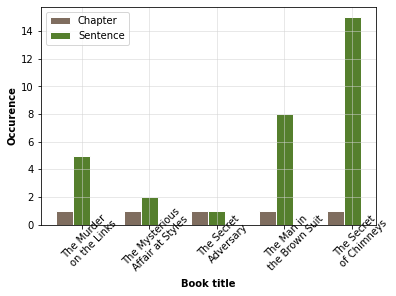

In [458]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bars
barWidth = 0.25
 
# set heights of bars
bars1 = [1, 1, 1, 1, 1]
bars2 = [5, 2, 1, 8, 15]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='Chapter')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='Sentence')
 
# Add xticks on the middle of the group bars
plt.xlabel('Book title', fontweight='bold')
plt.ylabel('Occurence', fontweight='bold')
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)

plt.xticks([r + barWidth for r in range(len(bars1))], ['The Murder \non the Links', 'The Mysterious \nAffair at Styles', 'The Secret \nAdversary', 'The Man in \nthe Brown Suit', 'The Secret \nof Chimneys'], rotation = 45, rotation_mode='anchor')

# Create legend & Show graphic
plt.legend()
plt.show()

### The Murder on the Links 

In [459]:
bookindex=1
print(det_occur[bookindex][0])

['Chapter: 1', 'Sentence: 5', 'Contents: i had been transacting some business in paris and was returning by the morning service to london where i was still sharing rooms with my old friend, the belgian ex-detective, hercule poirot']


###  The Mysterious Affair at Styles 

In [460]:
bookindex=2
print(det_occur[bookindex][0])

['Chapter: 1', 'Sentence: 2', 'Contents: nevertheless, in view of the world-wide notoriety which attended it, i have been asked, both by my friend poirot and the family themselves, to write an account of the whole story']


### The Secret Adversary 

In [461]:
bookindex=3
print(det_occur[bookindex][0])

['Chapter: 1', 'Sentence: 1', 'Contents:  “tommy, old thing']


### The Man in the Brown Suit 

In [462]:
bookindex=4
print(det_occur[bookindex][0])

['Chapter: 1', 'Sentence: 8', 'Contents: anne beddingfeld starts to narrate her adventures']


### The Secret of Chimneys 

In [463]:
bookindex=5
print(det_occur[bookindex][0])

['Chapter: 1', 'Sentence: 15', 'Contents: anthony cade and his friend had stepped a little apart']


## Q2. When is the crime first mentioned - the type of the crime and the details - chapter #, the sentence(s) # in a chapter,


##### Occurence of Crime for the first time visualization


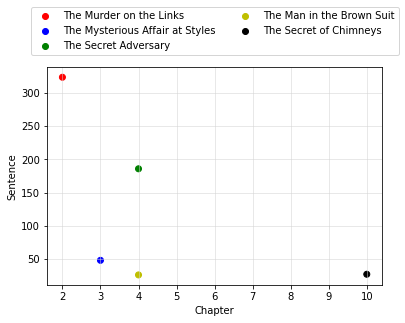

In [464]:
# When is the crime first mentioned

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MaxNLocator


#ax = plt.figure().gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))

x = [2,3,4,4,10]
y = [324, 48,  186, 26, 27]
classes = ['The Murder on the Links', 'The Mysterious Affair at Styles',  'The Secret Adversary', 'The Man in the Brown Suit', 'The Secret of Chimneys']
values = [0, 1, 2, 3, 4]

colours = ListedColormap(['r','b','g',  'y'  ,'k'])
scatter = plt.scatter(x, y,c=values, cmap=colours)


plt.legend(handles=scatter.legend_elements()[0], labels=classes, loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2)
plt.xlabel("Chapter")
plt.ylabel("Sentence")
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)


### The Murder on the Links 

In [465]:
bookindex=1
print(crime_occur[bookindex][0])

['Chapter: 2', 'Sentence: 324', 'Contents: “m. renauld was murdered this morning']


###  The Mysterious Affair at Styles 

In [466]:
bookindex=2
print(crime_occur[bookindex][0])

['Chapter: 3', 'Sentence: 48', 'Contents: mrs. inglethorp was lying on the bed, her whole form agitated by violent convulsions, in one of which she must have overturned the table beside her']


### The Secret Adversary 

In [467]:
bookindex=3
print(crime_occur[bookindex][0])

['Chapter: 4', 'Sentence: 186', 'Contents: the disappearance of jane finn was forgotten and the whole affair was lost in oblivion']


### The Man in the Brown Suit 

In [468]:
bookindex=4
print(crime_occur[bookindex][0])

['Chapter: 4', 'Sentence: 26', 'Contents: the daily budget  had jumped to the conclusion that the man in the tube had murdered the woman and afterwards committed suicide']


### The Secret of Chimneys 

In [469]:
bookindex=5
print(crime_occur[bookindex][0])

['Chapter: 10', 'Sentence: 27', 'Contents: one of his lordship’s guests, a foreign gentleman, discovered shot']


## Q3. When is the perpetrator first mentioned - chapter #, the sentence(s) # in a chapter


##### Occurence of perpetrator for the first time visualization


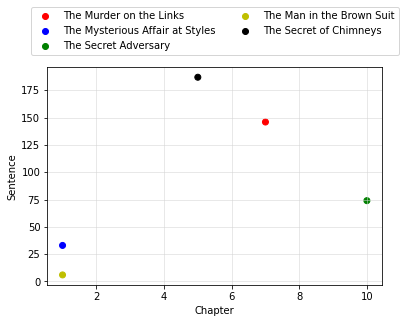

In [470]:
# When is the perpetrator first mentioned

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MaxNLocator


#ax = plt.figure().gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))

x = [7,1,10,1,5]
y = [146, 33,  74, 6, 187]
classes = ['The Murder on the Links', 'The Mysterious Affair at Styles',  'The Secret Adversary', 'The Man in the Brown Suit', 'The Secret of Chimneys']
values = [0, 1, 2, 3, 4]

colours = ListedColormap(['r','b','g',  'y'  ,'k'])
scatter = plt.scatter(x, y,c=values, cmap=colours)


plt.legend(handles=scatter.legend_elements()[0], labels=classes, loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2)
plt.xlabel("Chapter")
plt.ylabel("Sentence")
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)


### The Murder on the Links 

In [471]:
bookindex=1
print(perp_occur[bookindex][0])

['Chapter: 7', 'Sentence: 146', 'Contents: “mademoiselle daubreuil,” said m. hautet, sweeping off his hat, “we regret infinitely to disturb you, but the exigencies of the law—you comprehend']


###  The Mysterious Affair at Styles 

Alfred Inglethorp and Evelyn Howard are first mentioned in chapter 1 in sentences 32 and 40 respectively

In [472]:
bookindex=2
print(perp_occur[bookindex][0])

['Chapter: 1', 'Sentence: 33', 'Contents: as for evie—you remember evie']


### The Secret Adversary 

In [473]:
bookindex=3
print(perp_occur[bookindex][0])

['Chapter: 10', 'Sentence: 74', 'Contents: “in the meantime, you are going about everywhere with peel edgerton']


### The Man in the Brown Suit 

In [474]:
bookindex=4
print(perp_occur[bookindex][0])

['Chapter: 1', 'Sentence: 6', 'Contents: very fortunately, too, the gaps that i cannot supply from my own knowledge are amply covered by sir eustace pedler’s diary, of which he has kindly begged me to make use']


### The Secret of Chimneys 

In [475]:
bookindex=5
print(perp_occur[bookindex][0])

['Chapter: 15', 'Sentence: 187', 'Contents: let me see—yes—that’s mademoiselle brun’s room']


## Q4. What are the 3 words that occur around the perpetrator on each mention (i.e., the three words preceding, and the three words following the mention of a perpetrator),

### Word cloud based on frequency of words mentioned with perpetrator (stop words removed)

In [476]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


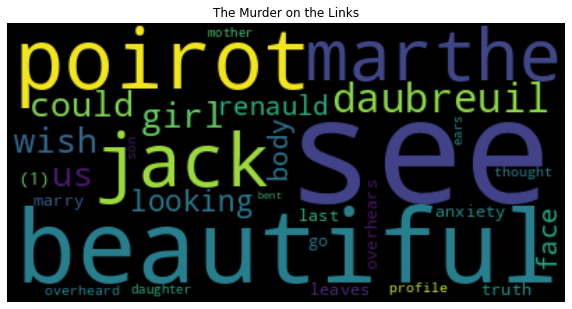

{'see': 5, 'beautiful': 5, 'poirot': 5, 'jack': 4, 'marthe': 4, 'daubreuil': 4, 'girl': 3, 'us': 3, 'wish': 3, 'could': 3, 'looking': 2, 'renauld': 2, 'body': 2, 'face': 2, 'anxiety': 2, 'marry': 2, 'go': 2, 'truth': 2, 'leaves': 2, 'last': 2, 'overhears': 2, '(1)': 2, 'profile': 2, 'overheard': 2, 'thought': 2, 'daughter': 2, 'son': 2, 'ears': 2, 'mother': 2, 'bent': 1}






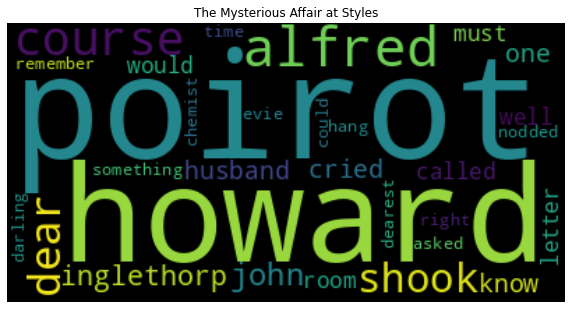

{'poirot': 12, 'howard': 10, 'alfred': 8, 'course': 6, 'dear': 5, 'shook': 5, 'john': 5, 'inglethorp': 5, 'cried': 4, 'husband': 4, 'one': 4, 'know': 4, 'letter': 3, 'room': 3, 'called': 3, 'well': 3, 'would': 3, 'must': 3, 'something': 3, 'could': 3, 'remember': 3, 'dearest': 3, 'asked': 3, 'time': 3, 'evie': 3, 'right': 3, 'hang': 3, 'darling': 3, 'chemist': 3, 'nodded': 3}






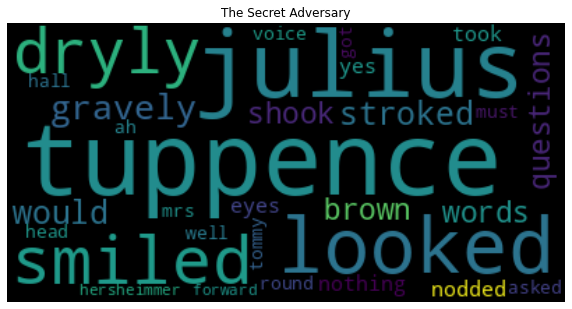

{'tuppence': 14, 'julius': 12, 'looked': 8, 'smiled': 6, 'dryly': 6, 'gravely': 6, 'stroked': 5, 'would': 5, 'words': 4, 'brown': 4, 'questions': 4, 'shook': 4, 'nothing': 4, 'yes': 4, 'eyes': 4, 'took': 4, 'nodded': 4, 'round': 3, 'well': 3, 'mrs': 3, 'ah': 3, 'must': 3, 'tommy': 3, 'got': 3, 'head': 3, 'hall': 3, 'voice': 3, 'asked': 3, 'hersheimmer': 3, 'forward': 3}






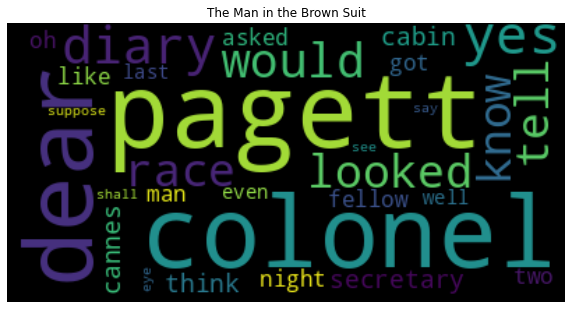

{'pagett': 10, 'colonel': 9, 'dear': 8, 'yes': 8, 'diary': 7, 'would': 6, 'looked': 6, 'race': 6, 'know': 6, 'tell': 6, 'secretary': 5, 'cabin': 5, 'cannes': 5, 'think': 5, 'like': 4, 'got': 4, 'oh': 4, 'two': 4, 'fellow': 4, 'asked': 4, 'night': 4, 'man': 4, 'even': 3, 'last': 3, 'well': 3, 'suppose': 3, 'see': 3, 'shall': 3, 'eye': 3, 'say': 3}






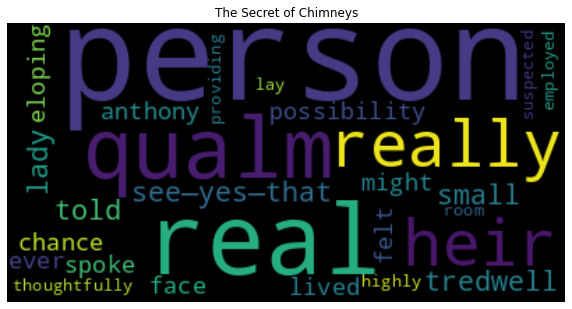

{'person': 2, 'real': 1, 'qualm': 1, 'really': 1, 'heir': 1, 'see—yes—that': 1, 'lady': 1, 'tredwell': 1, 'small': 1, 'told': 1, 'possibility': 1, 'chance': 1, 'ever': 1, 'spoke': 1, 'might': 1, 'anthony': 1, 'eloping': 1, 'face': 1, 'felt': 1, 'lived': 1, 'thoughtfully': 1, 'suspected': 1, 'employed': 1, 'highly': 1, 'room': 1, 'lay': 1, 'providing': 1}






In [477]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator    
for bookindex in range(1,6):
    title = get_title(bookindex)
    dfx = dict(sorted_freq_no_stopwords_list[bookindex]) 
    wordcloud = WordCloud().generate_from_frequencies(frequencies= dfx)
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
    print(dfx)
    print("\n\n\n")

### The Murder on the Links 

In [478]:
bookindex=1
for n in perp_neighbors[bookindex]:
  print(n)

['she', 'was', 'afraid', 'said', 'm', 'hautet']
['turned', 'to', 'her', 'dear', 'but', 'the']
['to', 'speak', 'before', 'as', 'my', 'daughter']
['us', 'it', 'was', 'i', 'beg', 'your']
['our', 'amélie', 'explained', 'with', 'a', 'blush']
['your', 'heart', 'on', 'she', 'is', 'not']
['the', 'quarrel', 'was', 'renauld', 'sprang', 'round']
['admitted', 'i', 'love', 'and', 'i', 'wish']
['boy', 'you', 'too', 'is', 'as', 'good']
['have', 'nothing', 'against', 'in', 'any', 'way']
['your', 'intentions', 'towards', 'he', 'resumed', 'he']
['he', 'had', 'against', 'to', 'that', 'he']
['i', 'was', 'marrying', 'and', 'not', 'her']
['i', 'wrote', 'to', 'telling', 'her', 'what']
['yesterday', 'it', 'was', 'today', 'it', 'is']
['to', 'rag', 'me', 'is', 'a', 'very']
['him', 'out', 'with', 'but', 'i', 'fear']
['beautiful', 'girl', 'like', 'and', 'the', 'result']
['always', 'think', 'of', 'as', 'the', 'girl']
['of', 'the', 'beautiful', 'chéri', 'she', 'was']
['you', 'know', 'it', 'jack', 'renauld', 'replie

###  The Mysterious Affair at Styles 

In [479]:
bookindex=2
for n in perp_neighbors[bookindex]:
  print(n)

['us', 'as', 'for', 'you', 'remember', 'evie']
['for', 'evie—you', 'remember', 'no', 'oh', 'i']
['a', 'great', 'sport—old', 'not', 'precisely', 'young']
['of', 'being', 'a', 'or', 'something', 'of']
['or', 'something', 'of', 's', 'though', 'she']
['that', 'she', 'and', 'were', 'engaged', 'the']
['for', 'that', 'fellow', 'he', 'checked', 'the']
['our', 'approach', 'hullo', 'here', 's', 'our']
['hero', 'mr', 'hastings', 'miss', 'howard', 'shook']
['mr', 'hastings—miss', 'howard', 'shook', 'hands', 'with']
['re', 'a', 'cynic', 'said', 'john', 'laughing']
['refreshed', 'well', 'said', 'drawing', 'off', 'her']
['princess', 'after', 'tea', 'i', 'll', 'write']
['are', 'so', 'thoughtful', 'dear', 'the', 'french']
['all', 'these', 'years', 'darling', 'mr', 'hastings—my']
['some', 'curiosity', 'at', 'darling', 'he', 'certainly']
['upon', 'the', 'company', 'in', 'particular', 'took']
['about', 'letters', 'to', 'and', 'her', 'husband']
['story', 'myself', 'remarked', 'lots', 'of', 'nonsense']
['of

### The Secret Adversary 

In [480]:
bookindex=3
for n in perp_neighbors[bookindex]:
  print(n)

['about', 'everywhere', 'with', 'not', 'only', 'is']
['and', 'give', 'up', 'mrs', 'vandemeyer', 'shook']
['late', 'they', 'say', 'can', 'smell', 'a']
['all', 'that', 'interests', 'boris', 'shook', 'his']
['her', 'his', 'name', 'she', 'looked', 'at']
['boris', 's', 'agitation', 'would', 'not', 'be']
['began', 'tuppence', 'but', 'was', 'already', 'on']
['her', 'encounter', 'with', 'julius', 'was', 'interested']
['of', 'appealing', 'to', 'indeed', 'she', 'had']
['to', 'ask', 'if', 'was', 'at', 'home']
['will', 'you', 'ask', 'if', 'i', 'can']
['or', 'two', 'later', 'will', 'see', 'you']
['is', 'mr', 'hersheimmer', 'pleased', 'to', 'meet']
['sit', 'down', 'asked', 'he', 'drew', 'forward']
['forward', 'two', 'chairs', 'said', 'tuppence', 'plunging']
['breath', 'tommy', 'queried', 'looking', 'across', 'at']
['it', 'was', 'admitted', 'gravely', 'well', 'i']
['me', 'a', 'hint', 'smiled', 'at', 'her']
['to', 'well', 'said', 'still', 'smiling', 'without']
['the', 'whole', 'story', 'i', 've', 'a']

### The Man in the Brown Suit 

In [481]:
bookindex=4
for n in perp_neighbors[bookindex]:
  print(n)

['amply', 'covered', 'by', 's', 'diary', 'of']
['the', 'property', 'of', 'm', 'p', 'is']
['have', 'a', 'clue', 'the', 'owner', 'of']
['the', 'wife', 'of', 's', 'gardener', 'who']
['course', 'there', 's', 's', 'place', 'said']
['reporters', 'i', 'am', 's', 'orders', 'are—']
['the', 'lodge', 'if', 'hadn', 't', 'been']
['me', 'i', 'thought', 'was', 'at', 'cannes']
['roll', 'belonging', 'to', 'which', 'had', 'rolled']
['the', 'diary', 'of', 'm', 'p', ')']
['so', 'you', 'know', 'know', 'what', 'i']
['england', 'at', 'once', 'you', 'need', 'suppose']
['suggestion', 'my', 'dear', 'the', 'common', 'post']
['reasons', 'my', 'dear', 'i', 'assure', 'you']
['minute', 'my', 'dear', 'one', 'minute', 'i']
['obliged', 'to', 'you', 'i', 'will', 'send']
['to', 'tell', 'you', 'that', 'he', 'comes']
['me', 'to', 'you', 'i', 'am', 'to']
['think', 'you', 'do', 'where', 'is', 'your']
['tell', 'you', 'this', 'mr', 'milray', 'would']
['oh', 'that', 's', 's', 'secretary', 'been']
['not', 'appeared', 'before', '

### The Secret of Chimneys 

In [482]:
bookindex=5
for n in perp_neighbors[bookindex]:
  print(n)

['me', 'see—yes—that', 's', 's', 'room', 'the']
['providing', 'an', 'heir', 'said', 'anthony', 'thoughtfully']
['felt', 'a', 'qualm', 'was', 'a', 'small']
['lady', 'with', 'whom', 'had', 'lived', 'for']
['such', 'person', 'as', 'but', 'i', 'was']
['such', 'person', 'as', 'had', 'ever', 'been']
['not', 'eloping', 'with', 'by', 'any', 'chance']
['her', 'face', 'lay', '', 'i', 'suspected']
['had', 'employed', 'a', 'and', 'spoke', 'highly']
['that', 'the', 'real', 'might', 'have', 'been']
['the', 'possibility', 'of', 's', 'being', 'an']
['was', 'really', 'to', 'he', 'told', 'tredwell']


## 5. When and how the detective/detectives and the perpetrators co-occur - chapter #, the sentence(s) # in a chapter,

### The Murder on the Links 

In [483]:
print("Detective(s): Hercule Poirot, Arthur Hastings")
print("Perpetrator: Mademoiselle Marthe")

bookindex=1
for n in co[bookindex]:
  print(n)

Detective(s): Hercule Poirot, Arthur Hastings
Perpetrator: Mademoiselle Marthe
['Chapter: 18', 'Sentence: 115', 'Contents: now, hastings, what was jack renauld doing here on that eventful evening, and if he did not see mademoiselle marthe whom did he see']
['Chapter: 24', 'Sentence: 188', 'Contents: marthe was at the door to meet us, and led poirot in, clinging with both hands to one of his']
['Chapter: 27', 'Sentence: 83', 'Contents: “while you break it in person to mademoiselle marthe, eh?” finished poirot, with a twinkle']
['Chapter: 27', 'Sentence: 157', 'Contents: “he is overdone,” murmured poirot to marthe']
['Chapter: 27', 'Sentence: 261', 'Contents: poirot looked over his shoulder once at the lighted window and the profile of marthe as she bent over her work']
['Chapter: 28', 'Sentence: 138', 'Contents: “however, hastings, things did not go quite as mademoiselle marthe had planned']
['Chapter: 28', 'Sentence: 146', 'Contents: “when did you first begin to suspect marthe daubreui

###  The Mysterious Affair at Styles 

In [484]:
print("Lead detective: Anne Beddingfeld")
print("Perpetrator: Sir Eustace Pedler")

bookindex=2
for n in co[bookindex]:
  print(n)

Lead detective: Anne Beddingfeld
Perpetrator: Sir Eustace Pedler
['Chapter: 1', 'Sentence: 83', 'Contents: mr. hastings—miss howard']
['Chapter: 1', 'Sentence: 126', 'Contents: alfred, darling, mr. hastings—my husband']
['Chapter: 1', 'Sentence: 145', 'Contents: presently mrs. inglethorp turned to give some instructions about letters to evelyn howard, and her husband addressed me in his painstaking voice: “is soldiering your regular profession, mr. hastings']
['Chapter: 4', 'Sentence: 294', 'Contents: we passed through alfred inglethorp’s room, and poirot delayed long enough to make a brief but fairly comprehensive examination of it']
['Chapter: 5', 'Sentence: 234', 'Contents: “suppose,” suggested poirot, “that, unknown to you, she had made a new will in favour of someone who was not, in any sense of the word, a member of the family—we will say miss howard, for instance—would you be surprised']
['Chapter: 5', 'Sentence: 378', 'Contents: miss howard shook hands with poirot, but glanced 

In [485]:
print("Detective(s): Hercule Poirot, Arthur Hastings")
print("Perpetrator: Evelyn Howard, Alfred Inglethorp ")

bookindex=2
for n in co[bookindex]:
  print(n)

Detective(s): Hercule Poirot, Arthur Hastings
Perpetrator: Evelyn Howard, Alfred Inglethorp 
['Chapter: 1', 'Sentence: 83', 'Contents: mr. hastings—miss howard']
['Chapter: 1', 'Sentence: 126', 'Contents: alfred, darling, mr. hastings—my husband']
['Chapter: 1', 'Sentence: 145', 'Contents: presently mrs. inglethorp turned to give some instructions about letters to evelyn howard, and her husband addressed me in his painstaking voice: “is soldiering your regular profession, mr. hastings']
['Chapter: 4', 'Sentence: 294', 'Contents: we passed through alfred inglethorp’s room, and poirot delayed long enough to make a brief but fairly comprehensive examination of it']
['Chapter: 5', 'Sentence: 234', 'Contents: “suppose,” suggested poirot, “that, unknown to you, she had made a new will in favour of someone who was not, in any sense of the word, a member of the family—we will say miss howard, for instance—would you be surprised']
['Chapter: 5', 'Sentence: 378', 'Contents: miss howard shook han

### The Secret Adversary 

In [486]:
print("Lead detectives: Tommy and Tuppence")
print("Perpetrator: Sir James Peel Edgerton\n")

bookindex=3
for n in co[bookindex]:
  print(n)



Lead detectives: Tommy and Tuppence
Perpetrator: Sir James Peel Edgerton

['Chapter: 10', 'Sentence: 171', 'Contents: tuppence was undecided for the moment whether to put him down as an actor or a lawyer, but her doubts were soon solved as he gave her his name: sir james peel edgerton']
['Chapter: 12', 'Sentence: 61', 'Contents: “sir james,” said tuppence, plunging boldly, “i dare say you will think it is most awful cheek of me coming here like this']
['Chapter: 12', 'Sentence: 64', 'Contents: “tommy?” queried sir james, looking across at the american']
['Chapter: 12', 'Sentence: 105', 'Contents: “oh, sir james,” broke out tuppence, “what do you think has become of tommy']
['Chapter: 13', 'Sentence: 9', 'Contents: between them sir james and tuppence lifted mrs. vandemeyer and carried her to the bed']
['Chapter: 13', 'Sentence: 59', 'Contents: “miss tuppence is right,” said sir james quietly']
['Chapter: 13', 'Sentence: 129', 'Contents: “now then, miss tuppence,” said sir james, “you kn

### The Man in the Brown Suit 

In [487]:
print("Lead detective: Anne Beddingfeld")
print("Perpetrator: Sir Eustace Pedler")

bookindex=4
for n in co[bookindex]:
  print(n)

Lead detective: Anne Beddingfeld
Perpetrator: Sir Eustace Pedler
['Chapter: 20', 'Sentence: 141', 'Contents: “oh, anne, you surely can’t suspect colonel race or sir eustace']
['Chapter: 33', 'Sentence: 110', 'Contents: you didn’t know, did you, sir eustace, that anne had an arrangement with me by which we should know whether communications from one to the other were genuine']


### The Secret of Chimneys 

In [488]:
print("Lead detective: Anthony Cade")
print("Perpetrator(s): Mademoiselle Brun")

bookindex=5
for n in co[bookindex]:
  print(n)

Lead detective: Anthony Cade
Perpetrator(s): Mademoiselle Brun
['Chapter: 15', 'Sentence: 194', 'Contents: “mademoiselle brun,” said anthony thoughtfully']


## Q6. When are other suspects first introduced - chapter #, the sentence(s) # in a chapter


##### Occurence of other suspects for the first time visualization


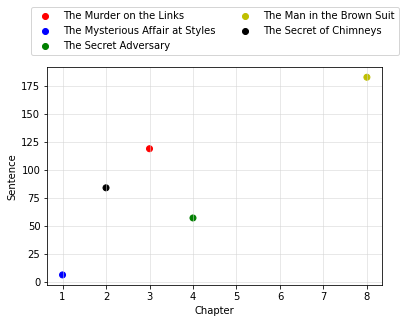

In [489]:
# When are other suspects first introduced

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MaxNLocator


#ax = plt.figure().gca()
#ax.xaxis.set_major_locator(MaxNLocator(integer=True))

x = [3,1, 4,8,2]
y = [119, 6,  57, 183, 84]
classes = ['The Murder on the Links', 'The Mysterious Affair at Styles',  'The Secret Adversary', 'The Man in the Brown Suit', 'The Secret of Chimneys']
values = [0, 1, 2, 3, 4]

colours = ListedColormap(['r','b','g',  'y'  ,'k'])
scatter = plt.scatter(x, y,c=values, cmap=colours)


plt.legend(handles=scatter.legend_elements()[0], labels=classes, loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=2)
plt.xlabel("Chapter")
plt.ylabel("Sentence")
plt.grid(color='lightgrey', linestyle='-', linewidth=.5)


### The Murder on the Links 

In [490]:
bookindex=1
print(sus_occur[bookindex][0])

['Chapter: 3', 'Sentence: 119', 'Contents: finally there are madame renauld and her son, m. jack renauld']


###  The Mysterious Affair at Styles 

In [491]:
bookindex=2
print(sus_occur[bookindex][0])

['Chapter: 1', 'Sentence: 6', 'Contents: having no near relations or friends, i was trying to make up my mind what to do, when i ran across john cavendish']


### The Secret Adversary 

In [492]:
bookindex=3
print(sus_occur[bookindex][0])

['Chapter: 4', 'Sentence: 57', 'Contents: “yours truly, “julius p. hersheimmer']


### The Man in the Brown Suit 

In [493]:
bookindex=4
print(sus_occur[bookindex][0])

['Chapter: 8', 'Sentence: 183', 'Contents: “harry rayburn seems quite a suitable name,” he observed']


### The Secret of Chimneys 

In [494]:
bookindex=5
print(sus_occur[bookindex][0])

['Chapter: 2', 'Sentence: 84', 'Contents: they were king victor’s people, he said']




## Discussion

#### Data Loading
In order to track the exact location of match occurences, we opted to store the corpus as a nested dictionary. The corpus dictionary containts the titles, tokenized contents, and blobbed contents of each book. Internally, the dictionaries are accessied via a numerical index that corresponds to each book, chapter, and sentence. Each book consists of a dictionary of chapter titles and a dictionary of chapter contents. Each chapter consists of a dictionary of sentences. Books, chapters, and sentences are 1-indexed as this allowed for the inclusion of prologue chapters (index=0) that appeared in some of the books. The chapters and sentences were tokenized using regular expressions. Each book followed a unique pattern for the chapter titles as well as the Project Gutenberg prologue and epilogue, so we use the book index to select the appropriate regex for each book. The sentence splitting regex we used accounts for sentences that include punctuation that does not end the sentence. For example, the sentence '"What?" he exclaimed' is not split on the question mark. Accounting for the wide variety of unicode quotation marks proved a minor challenge. Special care was also taken not to split on unusual abbreviations like "Mlle." We found it useful to be as explicit as possible when choosing not to split a sentence at an abbreviation as using wildcards introduced to many edge cases. The exception was the pattern "\w\.\w\." since that general case catches abbreviated names as well as common patterns like "e.g." and "i.e." In general, negative lookahead and lookbehind expressions were critical for maximizing sentence splitting performance. The blobbed contents of each book consits of a single string with all of the words in the book minus chapter titles and punctuation to allow us to extract neighboring words without regard for sentence barriers. 
#### Data Cleaning
During data cleaning, we first identified which types of unique white spaces were included in the text, and opted to remove "\r\n", hair-spaces and replace them with a single space to make all spaces uniform. One reason to replace rather than remove '\r\n' was due to the fact that multi-line sentences in some cases did not use spaces to separate words and just relied on the carriage-return/new-line.

### The Secret Adversary

"The Secret Adversary" is centered around the disappearance of Jane Finn and the theft of important documents that have the potential to overthrow the government. As a result, we included kidnapping, espionage, theft, and conspiracy as potential target crimes. We also attempted finding keywords that could help us extract the conspiracy but, unfortunately, there were not many occurrences of "spy", "espionage", or "conspiracy" to provide enough context for the crime. For this reason, for our analysis we focused in the kidnapping as the main crime.

One additional challenge for this book is that Mr. Brown, one of the characters, is used to refer to both Julius Hersheimmer and Sir James Peel Edgerton. Later in the book, the author reveals that the real Mr. Brown is Sir James Peel Edgerton and that he is the perpetrator of the crime. For this reason, we excluded Mr. Brown from our search to avoid introducing references to a suspect instead of the perpetrator. The bag of words analysis actually was able to identify this issue. 
Another character, Jane Finn, is the main victim but the name is also used by characters pretending to be Jane Finn. Because there are multiple aliases for the same character, human intervention is required to identify which character is the focus of the matching sentence. 

In addition to common stop words obtained from NLTK, we also excluded "said", "mr", "miss", since the book is very conversational in nature.  

### The Murder on the Links
This case is a straightforward murder with a single red herring. Mr. Renauld is stabbed to death early in the book and suspicion falls upon his son. However, the real culprit is Mademoiselle Daubreuil. Years before the current murder takes place, Mr. Renauld and Madame Daubreuil, mother of Mademoiselle Daubreuil, had conspired together and killed Madame Daubreuil's husband. When the murder was uncovered, Mr.Renauld disappeared, prompting a long mission of revenge for the mother and daughter. One interesting aspect of this case is the use of the word "murder." Characters throw around many accusaions of murder with brief explanation of how they think the murder occured. This makes the search term more confounding than useful. In order to extract quality details of the murder as opposed to wild accusations, we found it necessary to search for paired terms like "death..occured," examination...body", and "body...discovered" with regex wild cards for any intervening words. 

### The Mysterious Affair at Styles

This case is another murder. It is complicated by the fact that, in order to prevent a double-jeopardy situation, Poirot argues that one of the two guilty suspects is innocent. Once the trial has moved on, Poirot reveals that the man he had previously argued was innocent is in fact guilty. The reason for this is that the guilty man worked with a partner so that it was physically impossible for him to have committed the whole murder alone. In other words, he is "innocent" of half the murder tasks. The guilty pair are Alfred Inglethorp (huspand of the victim) and Evelyn Howard (secretary/assistant of the victim). We found it difficult to catch the moment Poirot reveals the identity of the murderers. Poirot reads a murder-planning letter written to Evelyn Howard, thereby revealing her guilt without actually making any accusation. Likewise, Alfred is exposed when he lunges from hiding. As far as detecting the murderers based on regexes, we had to wait until then next chapter when Poirot launches into an exposition on why he suspected the pair. At this point, the murderers' names occur in sentences that mention their crime.



## Additional/Extra Analysis

### Tokenization Comparison with Spacy

In [495]:
!pip install spacy

Defaulting to user installation because normal site-packages is not writeable


In [496]:
from spacy.lang.en import English 

# W.I.P.

dirty_corpus=get_corpus()


bookid=3
nch=len(corpus[bookid]["chapters"])
print(f"Book {bookid} has {nch} chapters.")

for bookid in range(1,6):
    nch=len(corpus[bookid]["chapters"])
    print(f"Book {bookid} has {nch} chapters.")
    for chid in range(1,nch):
        dirty_chapter=dirty_corpus[bookid]["contents"][chid]
        ch_doc = nlp(dirty_chapter)
        sentences = [sent.text.strip() for sent in ch_doc.sents]
        #print(sentences)
        print(f"Book {bookid}, Chapter {chid}: {len(sentences)}(spacy), {len(corpus[bookid]['contents'][chid])}(regex) sentences.")

#print(dirty_corpus[bookid]["contents"][0])

#dirty_chapter=dirty_corpus[bookid]["contents"][1]
#b3c1_spacy = dirty_chapter
#print(b3c1_spacy)
#b3c1_doc = nlp(b3c1_spacy)
#sentences_b3c1_spacy = [sent.text.strip() for sent in b3c1_doc.sents]
#print(sentences_b3c1_spacy)
#print(len(sentences_b3c1_spacy))

print(len(corpus[3]["contents"][1]))


Book 3 has 29 chapters.
Book 1 has 28 chapters.


NameError: name 'nlp' is not defined


#### Bag of Words Analysis 


In [ ]:
perp1=get_perp(1)
perp2=get_perp(2)
perp3=get_perp(3)
perp4=get_perp(4)
perp5=get_perp(5)
red1=get_sus(1)
red2=get_sus(2)
red3=get_sus(3)
red4=get_sus(4)
red5=get_sus(5)
perp_neighbors1=get_3words(1,perp1)
perp_neighbors2=get_3words(2,perp2)
perp_neighbors3=get_3words(3,perp3)
perp_neighbors4=get_3words(4,perp4)
perp_neighbors5=get_3words(5,perp5)

sus_neighbors1=get_3words(1,red1)
sus_neighbors2=get_3words(2,red2)
sus_neighbors3=get_3words(3,red3)
sus_neighbors4=get_3words(4,red4)
sus_neighbors5=get_3words(5,red5)

perp5bag=[word for words in perp_neighbors5 for word in words]
perp4bag=[word for words in perp_neighbors4 for word in words]
perp3bag=[word for words in perp_neighbors3 for word in words]
perp2bag=[word for words in perp_neighbors2 for word in words]
perp1bag=[word for words in perp_neighbors1 for word in words]

sus1bag=[word for words in sus_neighbors1 for word in words]
sus2bag=[word for words in sus_neighbors2 for word in words]
sus3bag=[word for words in sus_neighbors3 for word in words]
sus4bag=[word for words in sus_neighbors4 for word in words]
sus5bag=[word for words in sus_neighbors5 for word in words]
perp5bag=' '.join(perp5bag)
perp4bag=' '.join(perp4bag)
perp3bag=' '.join(perp3bag)
perp2bag=' '.join(perp2bag)
perp1bag=' '.join(perp1bag)
sus1bag=' '.join(sus1bag)
sus2bag=' '.join(sus2bag)
sus3bag=' '.join(sus3bag)
sus4bag=' '.join(sus4bag)
sus5bag=' '.join(sus5bag)

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(stop_words='english',max_df=.80)
trsfm=vectorizer.fit_transform([perp1bag,perp2bag,perp3bag,perp4bag,perp5bag])
tfid_data=pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Perp 1','Perp 2','Perp 3','Perp 4','Perp 5'])
print(tfid_data)
tfid_data=tfid_data.replace(0,.00001)
print(tfid_data)
import numpy as np
importance = np.argsort(np.asarray(trsfm.sum(axis=0)).ravel())[::-1]
tfidf_feature_names = np.array(vectorizer.get_feature_names())
print(tfidf_feature_names[importance[:20]])
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(trsfm[0:10], trsfm))


In [ ]:
!pip install textdistance
import textdistance

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

cfm=vectorizer.fit_transform([perp1bag,perp2bag,perp3bag,perp4bag,perp5bag])
c_data=pd.DataFrame(cfm.toarray(),columns=vectorizer.get_feature_names(),index=['Perp 1','Perp 2','Perp 3','Perp 4','Perp 5'])
print(c_data)
count_list = pd.DataFrame(c_data.sum(axis=0).sort_values(ascending=False))
print(len(count_list)*.01)
print(count_list[14:])
trimmed=count_list.index.values
trimmed_bag=' '.join(trimmed)
print(trimmed_bag)

from sklearn.metrics.pairwise import cosine_similarity
print("hamming")
print("book 1")
print(len(perp1bag),len(sus1bag))
print(textdistance.cosine.distance(trimmed_bag,perp1bag))
print(textdistance.cosine.distance(trimmed_bag,sus1bag))
print("book 2")
print(textdistance.cosine.distance(trimmed_bag,perp2bag))
print(textdistance.cosine.distance(trimmed_bag,sus2bag))
print("book 3")
print(textdistance.cosine.distance(trimmed_bag,perp3bag))
print(textdistance.cosine.distance(trimmed_bag,sus3bag))
print("book 4")
print(textdistance.cosine.distance(trimmed_bag,perp4bag))
print(textdistance.cosine.distance(trimmed_bag,sus4bag))
print("book 5")
print(textdistance.cosine.distance(trimmed_bag,perp5bag))
print(textdistance.cosine.distance(trimmed_bag,sus5bag))



print("cosine")
print(textdistance.cosine.normalized_distance(trimmed_bag,perp1bag))
print(textdistance.cosine.normalized_distance(trimmed_bag,sus1bag))
print("jaccard")
print(textdistance.jaccard.normalized_distance(trimmed_bag,perp1bag))
print(textdistance.jaccard.normalized_distance(trimmed_bag,sus1bag))


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer(stop_words='english',max_df=.80)
trsfm=vectorizer.fit_transform([perp1bag,perp2bag,perp3bag,perp4bag,perp5bag])
tfid_data=pd.DataFrame(trsfm.toarray(),columns=vectorizer.get_feature_names(),index=['Perp 1','Perp 2','Perp 3','Perp 4','Perp 5'])
tfid_data=tfid_data.replace(0,.00001)
print(tfid_data)
from scipy import stats
vectorizer2 = TfidfVectorizer()
count_list = pd.DataFrame(tfid_data.sum(axis=0).sort_values(ascending=False))
print(len(count_list)*.01)
print(count_list[15:])
trimmed=count_list[15:].index.values
print(trimmed)
#print(stats.entropy(df.))

In [ ]:
!pip install textdistance
import textdistance

In [ ]:
print("Hamming")
print(textdistance.hamming.normalized_distance(perp1bag,perp2bag))
print(textdistance.hamming.normalized_distance(perp1bag,perp3bag))
print(textdistance.hamming.normalized_distance(perp1bag,perp4bag))
print(textdistance.hamming.normalized_distance(perp1bag,perp5bag))
print(textdistance.hamming.normalized_distance(perp1bag,sus1bag))
print(textdistance.hamming.normalized_distance(perp1bag,sus2bag))
print(textdistance.hamming.normalized_distance(perp1bag,sus3bag))
print(textdistance.hamming.normalized_distance(perp1bag,sus4bag))
print(textdistance.hamming.normalized_distance(perp1bag,sus5bag))
print("Jaccard")
print(textdistance.jaccard.distance(perp1bag,perp2bag))
print(textdistance.jaccard.distance(perp1bag,perp3bag))
print(textdistance.jaccard.distance(perp1bag,perp4bag))
print(textdistance.jaccard.distance(perp1bag,perp5bag))
print(textdistance.jaccard.distance(perp1bag,sus1bag))
print(textdistance.jaccard.distance(perp1bag,sus2bag))
print(textdistance.jaccard.distance(perp1bag,sus3bag))
print(textdistance.jaccard.distance(perp1bag,sus4bag))
print(textdistance.jaccard.distance(perp1bag,sus5bag))
print("Bag")
print(textdistance.bag.normalized_distance(perp1bag,perp2bag))
print(textdistance.bag.normalized_distance(perp1bag,perp3bag))
print(textdistance.bag.normalized_distance(perp1bag,perp4bag))
print(textdistance.bag.normalized_distance(perp1bag,perp5bag))
print(textdistance.bag.normalized_distance(perp1bag,sus1bag))
print(textdistance.bag.normalized_distance(perp1bag,sus2bag))
print(textdistance.bag.normalized_distance(perp1bag,sus3bag))
print(textdistance.bag.normalized_distance(perp1bag,sus4bag))
print(textdistance.bag.normalized_distance(perp1bag,sus5bag))
print("Overlap")
print(textdistance.overlap.normalized_distance(perp1bag,perp2bag))
print(textdistance.overlap.normalized_distance(perp1bag,perp3bag))
print(textdistance.overlap.normalized_distance(perp1bag,perp4bag))
print(textdistance.overlap.normalized_distance(perp1bag,perp5bag))
print(textdistance.overlap.normalized_distance(perp1bag,sus1bag))
print(textdistance.overlap.normalized_distance(perp1bag,sus2bag))
print(textdistance.overlap.normalized_distance(perp1bag,sus3bag))
print(textdistance.overlap.normalized_distance(perp1bag,sus4bag))
print(textdistance.overlap.normalized_distance(perp1bag,sus5bag))

In [ ]:
print("using books 1,3,4,5")
bag1345=' '.join([perp1bag,perp3bag,perp4bag,perp5bag])
print("book 1")
print(textdistance.jaccard.distance(bag1345,perp1bag))
print(textdistance.jaccard.distance(bag1345,sus1bag))

print("book 2")
print(textdistance.jaccard.distance(bag1345,perp2bag))
print(textdistance.jaccard.distance(bag1345,sus2bag))
print("book 3")
print(textdistance.jaccard.distance(bag1345,perp3bag))
print(textdistance.jaccard.distance(bag1345,sus3bag))
print("book 4")
print(textdistance.jaccard.distance(bag1345,perp4bag))
print(textdistance.jaccard.distance(bag1345,sus4bag))
print("book 5")
print(textdistance.jaccard.distance(bag1345,perp5bag))
print(textdistance.jaccard.distance(bag1345,sus5bag))
print("using 1345 fails on 1")
print("using books 1,2,4,5")
bag1245=' '.join([perp1bag,perp2bag,perp4bag,perp5bag])
print("book 1")
print(textdistance.jaccard.distance(bag1245,perp1bag))
print(textdistance.jaccard.distance(bag1245,sus1bag))
print("book 2")
print(textdistance.jaccard.distance(bag1245,perp2bag))
print(textdistance.jaccard.distance(bag1245,sus2bag))
print("book 3")
print(textdistance.jaccard.distance(bag1245,perp3bag))
print(textdistance.jaccard.distance(bag1245,sus3bag))
print("book 4")
print(textdistance.jaccard.distance(bag1245,perp4bag))
print(textdistance.jaccard.distance(bag1245,sus4bag))
print("book 5")
print(textdistance.jaccard.distance(bag1245,perp5bag))
print(textdistance.jaccard.distance(bag1245,sus5bag))
print('using books 1245 fails on 1')
print("using books 1,2,3,5")
bag1235=' '.join([perp1bag,perp2bag,perp3bag,perp5bag])
print("book 1")
print(textdistance.jaccard.distance(bag1235,perp1bag))
print(textdistance.jaccard.distance(bag1235,sus1bag))

print("book 2")
print(textdistance.jaccard.distance(bag1235,perp2bag))
print(textdistance.jaccard.distance(bag1235,sus2bag))
print("book 3")
print(textdistance.jaccard.distance(bag1235,perp3bag))
print(textdistance.jaccard.distance(bag1235,sus3bag))
print("book 4")
print(textdistance.jaccard.distance(bag1235,perp4bag))
print(textdistance.jaccard.distance(bag1235,sus4bag))
print("book 5")
print(textdistance.jaccard.distance(bag1235,perp5bag))
print(textdistance.jaccard.distance(bag1235,sus5bag))
print("using books 1235 fails on 1")
print("using books 1,2,3,4")
bag1234=' '.join([perp1bag,perp2bag,perp3bag,perp4bag])
print("book 1")
print(textdistance.jaccard.distance(bag1234,perp1bag))
print(textdistance.jaccard.distance(bag1234,sus1bag))
print("book 2")
print(textdistance.jaccard.distance(bag1234,perp2bag))
print(textdistance.jaccard.distance(bag1234,sus2bag))
print("book 3")
print(textdistance.jaccard.distance(bag1234,perp3bag))
print(textdistance.jaccard.distance(bag1234,sus3bag))
print("book 4")
print(textdistance.jaccard.distance(bag1234,perp4bag))
print(textdistance.jaccard.distance(bag1234,sus4bag))
print("book 5")
print(textdistance.jaccard.distance(bag1234,perp5bag))
print(textdistance.jaccard.distance(bag1234,sus5bag))
print("using books 1234 fails on 1")
print("using books 2,3,4,5")
bag2345=' '.join([perp2bag,perp3bag,perp4bag,perp5bag])
print("book 1")
print(textdistance.jaccard.distance(bag2345,perp1bag))
print(textdistance.jaccard.distance(bag2345,sus1bag))

print("book 2")
print(textdistance.jaccard.distance(bag2345,perp2bag))
print(textdistance.jaccard.distance(bag2345,sus2bag))
print("book 3")
print(textdistance.jaccard.distance(bag2345,perp3bag))
print(textdistance.jaccard.distance(bag2345,sus3bag))
print("book 4")
print(textdistance.jaccard.distance(bag2345,perp4bag))
print(textdistance.jaccard.distance(bag2345,sus4bag))
print("book 5")
print(textdistance.jaccard.distance(bag2345,perp5bag))
print(textdistance.jaccard.distance(bag2345,sus5bag))




## Dev notes

In [ ]:
#Dev Notes: will refactor fetch() to generate dict of titles and indices rather than take in index
# I.e., fetch() is backwards. should assign index based on title while fetching url


#artifacts I've spotted in data:
# I noticed and "[Illustration]" artifact in the mysterious affair at style.

#possible start for sentence splitting regex
#sentence_regex = r'([\.\?!][\'\"\u2018\u2019\u201c\u201d\)\]]*\s*(?<!\w\.\w.)(?<![A-Z][a-z][a-z]\.)(?<![A-Z][a-z]\.)(?<![A-Z]\.)\s+)

# V: do we need to clean up contractions to be spelled out? e.g., "I'm" to "I am", "don't" to "do not".
#  